## **Reducción de dimensionalidad / Ingeniería de Características: Transformaciones de Variables (Core)**

En esta actividad, aplicarás diversas técnicas de transformación de variables para mejorar la calidad de los datos en el dataset «House Prices – Advanced Regression Techniques» disponible en Kaggle. Aprenderás a realizar transformaciones logarítmicas, escalado y creación de variables polinómicas para mejorar el rendimiento de los modelos predictivos.

**Enlace al dataset:** https://www.kaggle.com/c/house-prices-advanced-regression-techniques



### **Objetivo:**

El objetivo es realizar transformaciones de las variables en el dataset para mejorar la distribución de los datos y su relación con la variable objetivo (el precio de las casas). Estas transformaciones son clave para mejorar la precisión de los modelos de regresión y reducir sesgos en los datos.



### **Instrucciones:**

#### **1. Carga de datos:**
- Descarga el dataset «House Prices» de Kaggle. Realiza una exploración inicial de las variables numéricas y categóricas, prestando especial atención a aquellas que están relacionadas con el tamaño de la casa, el número de habitaciones y la calidad general.
- Revisa la distribución de la variable objetivo (precio de la casa) y observa si tiene algún sesgo.

#### **2. Exploración y preprocesamiento de datos:**
- Antes de aplicar las transformaciones, realiza un análisis de las variables con distribuciones asimétricas o que contengan outliers. Estos son buenos candidatos para transformaciones logarítmicas o polinómicas.
- También identifica variables que estén en escalas diferentes para aplicar técnicas de normalización o estandarización.

#### **3. Transformaciones de variables:**
- Aplica transformaciones logarítmicas a variables sesgadas como el «SalePrice» y otras variables numéricas que tengan una distribución sesgada.
- Crea variables polinómicas a partir de las variables numéricas, como el tamaño total de la casa. Por ejemplo, agrega el cuadrado o el cubo de estas variables como nuevas características para capturar posibles relaciones no lineales.
- Estandariza las variables numéricas para que todas tengan la misma escala, lo cual es útil cuando se entrenan modelos de regresión o algoritmos basados en distancia como KNN.

#### **4. Evaluación de las transformaciones:**
- Aplica un modelo de regresión antes y después de las transformaciones para evaluar su impacto en el rendimiento del modelo.
- Compara métricas como el RMSE (Root Mean Squared Error) y el R-squared para ver si las transformaciones logarítmicas y polinómicas han mejorado la predicción del precio de las casas.

#### **5. Interpretación de los resultados:**
- Analiza cuáles de las transformaciones aplicadas tuvieron un mayor impacto en la mejora del modelo. Discute cómo las transformaciones logarítmicas ayudan a manejar el sesgo en los datos y cómo las variables polinómicas capturan relaciones más complejas.
- Reflexiona sobre la importancia de transformar variables antes de aplicar modelos de machine learning.


### **Análisis de Resultados:**

- El análisis debe centrarse en cómo las diferentes transformaciones afectaron la distribución de las variables y cómo esto influyó en la precisión del modelo predictivo. Discute las ventajas y desventajas de las transformaciones aplicadas y su relevancia en problemas de regresión.

### ***Librerias y Dataset***

In [1]:
import os
import pandas as pd
import numpy as np
import utils
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from scipy.stats import f_oneway,pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import shapiro,ttest_1samp
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm

In [2]:
# Directorio donde se descargará el dataset
dataset_path = "datasets/house-prices"
os.makedirs(dataset_path, exist_ok=True)

# Cambiar al directorio del proyecto
os.chdir(dataset_path)

# Descargar el dataset desde Kaggle (requiere que configures el API de Kaggle previamente)
!kaggle competitions download -c house-prices-advanced-regression-techniques

# Extraer el archivo ZIP
zip_file_path = "house-prices-advanced-regression-techniques.zip"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(".")  # Extraer al directorio actual

# Cargar los archivos CSV
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


### ***Exploratory Data Analysis***

##### **Informacion**

In [3]:

# Mostrar las primeras filas del dataset de entrenamiento
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Eliminamos la columna Id porque no aporta nada

In [6]:
# Eliminar la columna Id
train = train.drop('Id', axis=1)

##### **Analisis de duplicados**

In [7]:
duplicados = train.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados en el dataset: {num_duplicados}")

Número de registros duplicados en el dataset: 0


##### **Analisis de las distribuciones**

###### **Numericas**

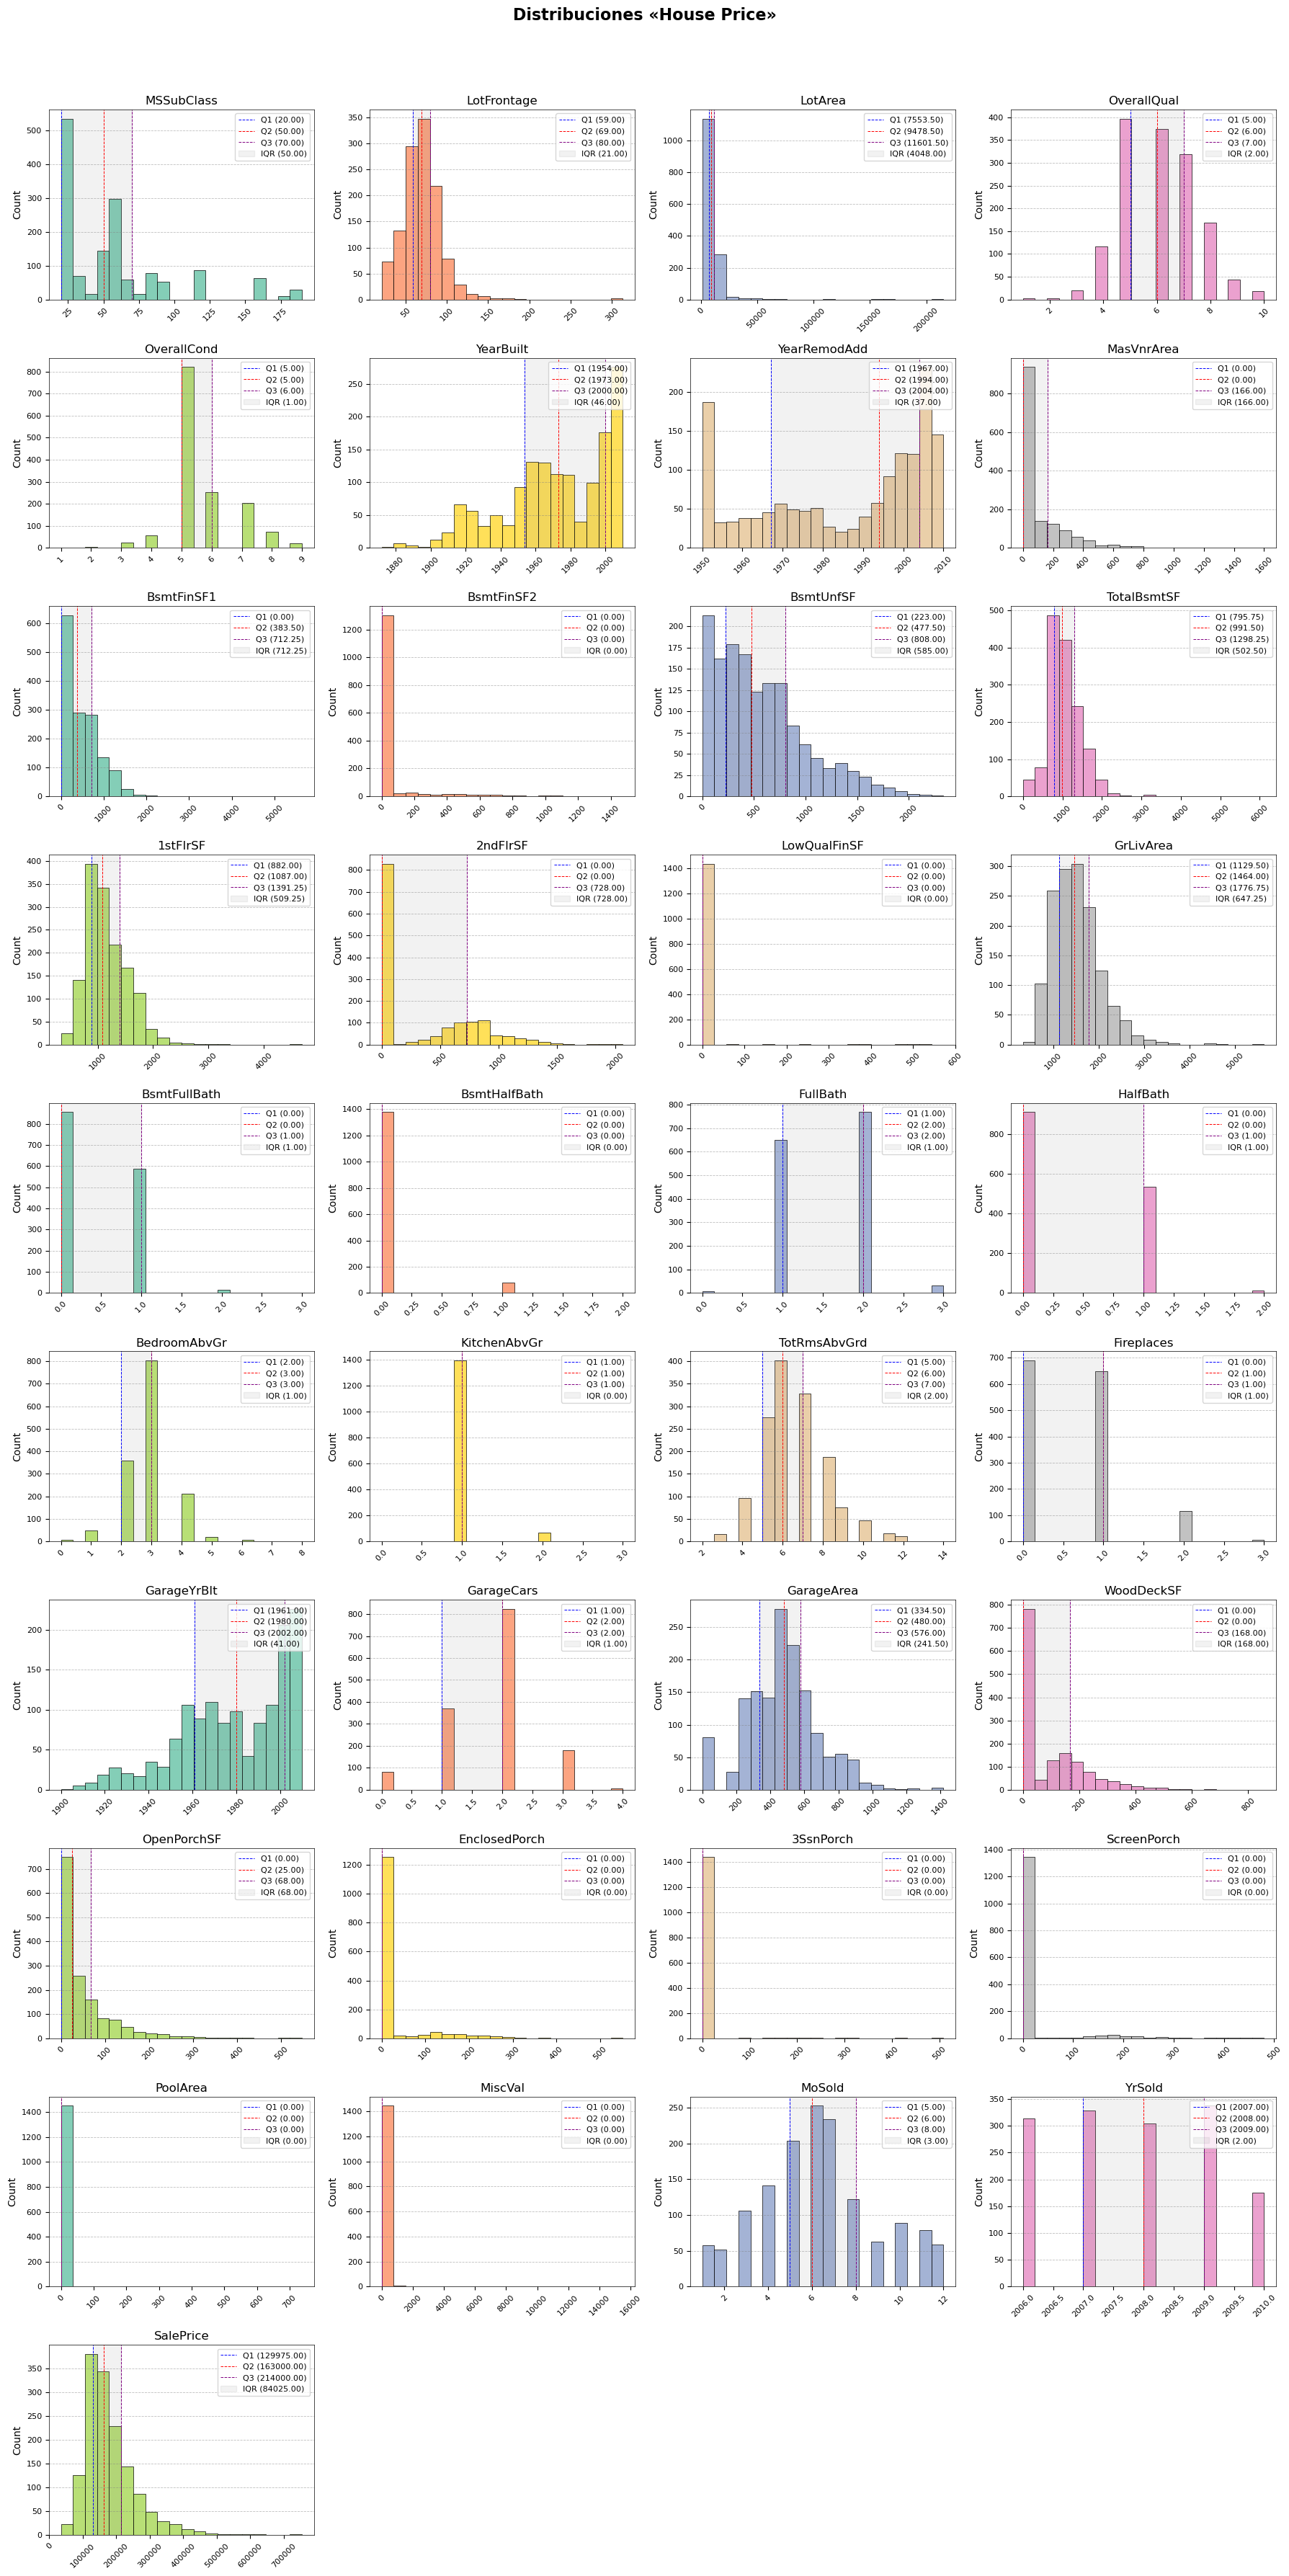

In [8]:
distributionplot = utils.plot_distributions2(
    train,  # DataFrame con los datos a graficar
    figsize=(18, 35),  # Tamaño de la figura (ancho x alto)
    nrows=10,  # Número de filas en la cuadrícula de subplots
    ncols=4,  # Número de columnas en la cuadrícula de subplots
    bins=20,  # Método de cálculo de bins ('rice', 'sqrt', 'sturges', etc.)
    color_palette='Set2',  # Paleta de colores de Seaborn
    show_iqr_and_legend=True,  # Desactivar tanto los rangos IQR como la leyenda
    kde=False,
    title='Distribuciones «House Price»'  # Título de la figura
)


###### **Categoricas**

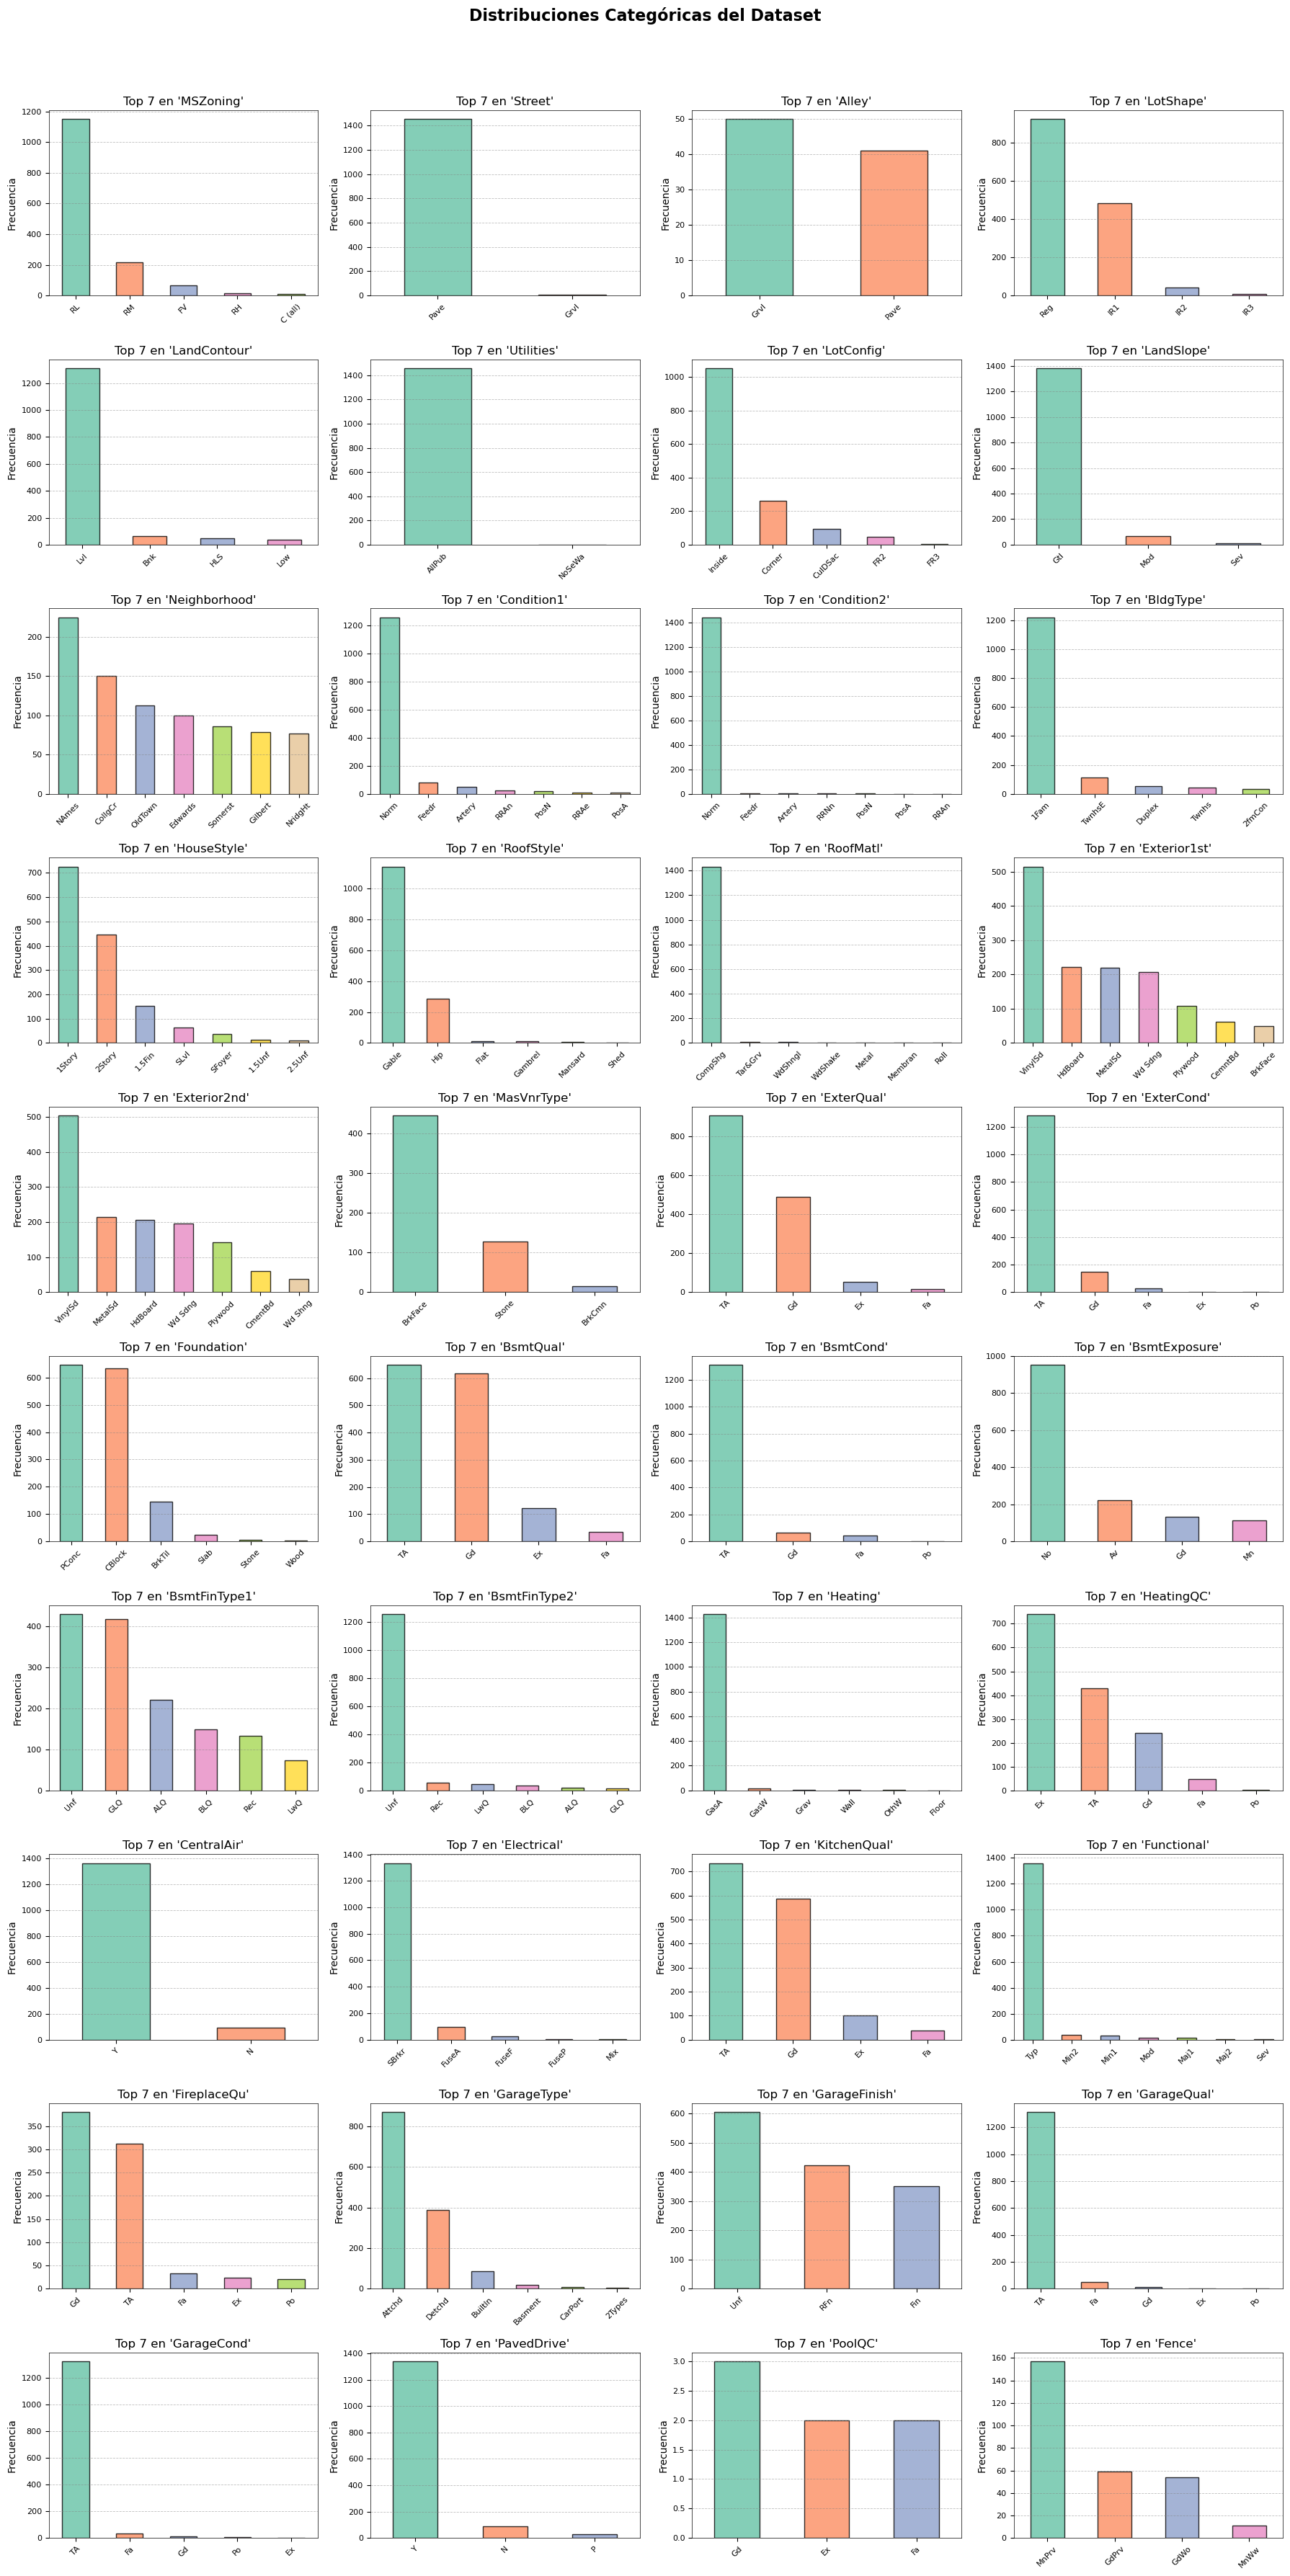

In [9]:
categorical_plot = utils.plot_categorical_distributions(
    train,               # DataFrame con los datos a graficar
    figsize=(18, 35),    # Tamaño de la figura (ancho x alto)
    nrows=10,            # Número de filas en la cuadrícula de subplots
    ncols=4,             # Número de columnas en la cuadrícula de subplots
    color=None,          # Deja color en None para usar la paleta
    palette="Set2",      # Paleta Set2 para barras
    edgecolor="black",   # Color del borde de las barras
    top_n=7,             # Mostrar las 7 categorías más frecuentes
    title="Distribuciones Categóricas del Dataset"  # Título de la figura
)


##### **Analisis de valores nulos**

In [10]:
utils.calculate_na_statistics(train).head(20)

,datos sin NAs en q,Na en q,Na en %
PoolQC,7,1453,99.52
MiscFeature,54,1406,96.30
Alley,91,1369,93.77
Fence,281,1179,80.75
MasVnrType,588,872,59.73
FireplaceQu,770,690,47.26
LotFrontage,1201,259,17.74
GarageYrBlt,1379,81,5.55
GarageCond,1379,81,5.55
GarageType,1379,81,5.55


##### **Analisis de Outliers**

Seleccionamos las variables numericas para calcular los outliers

In [11]:
data_numeric = train.select_dtypes(include=['int64', 'float64'])

Graficos de Outliers

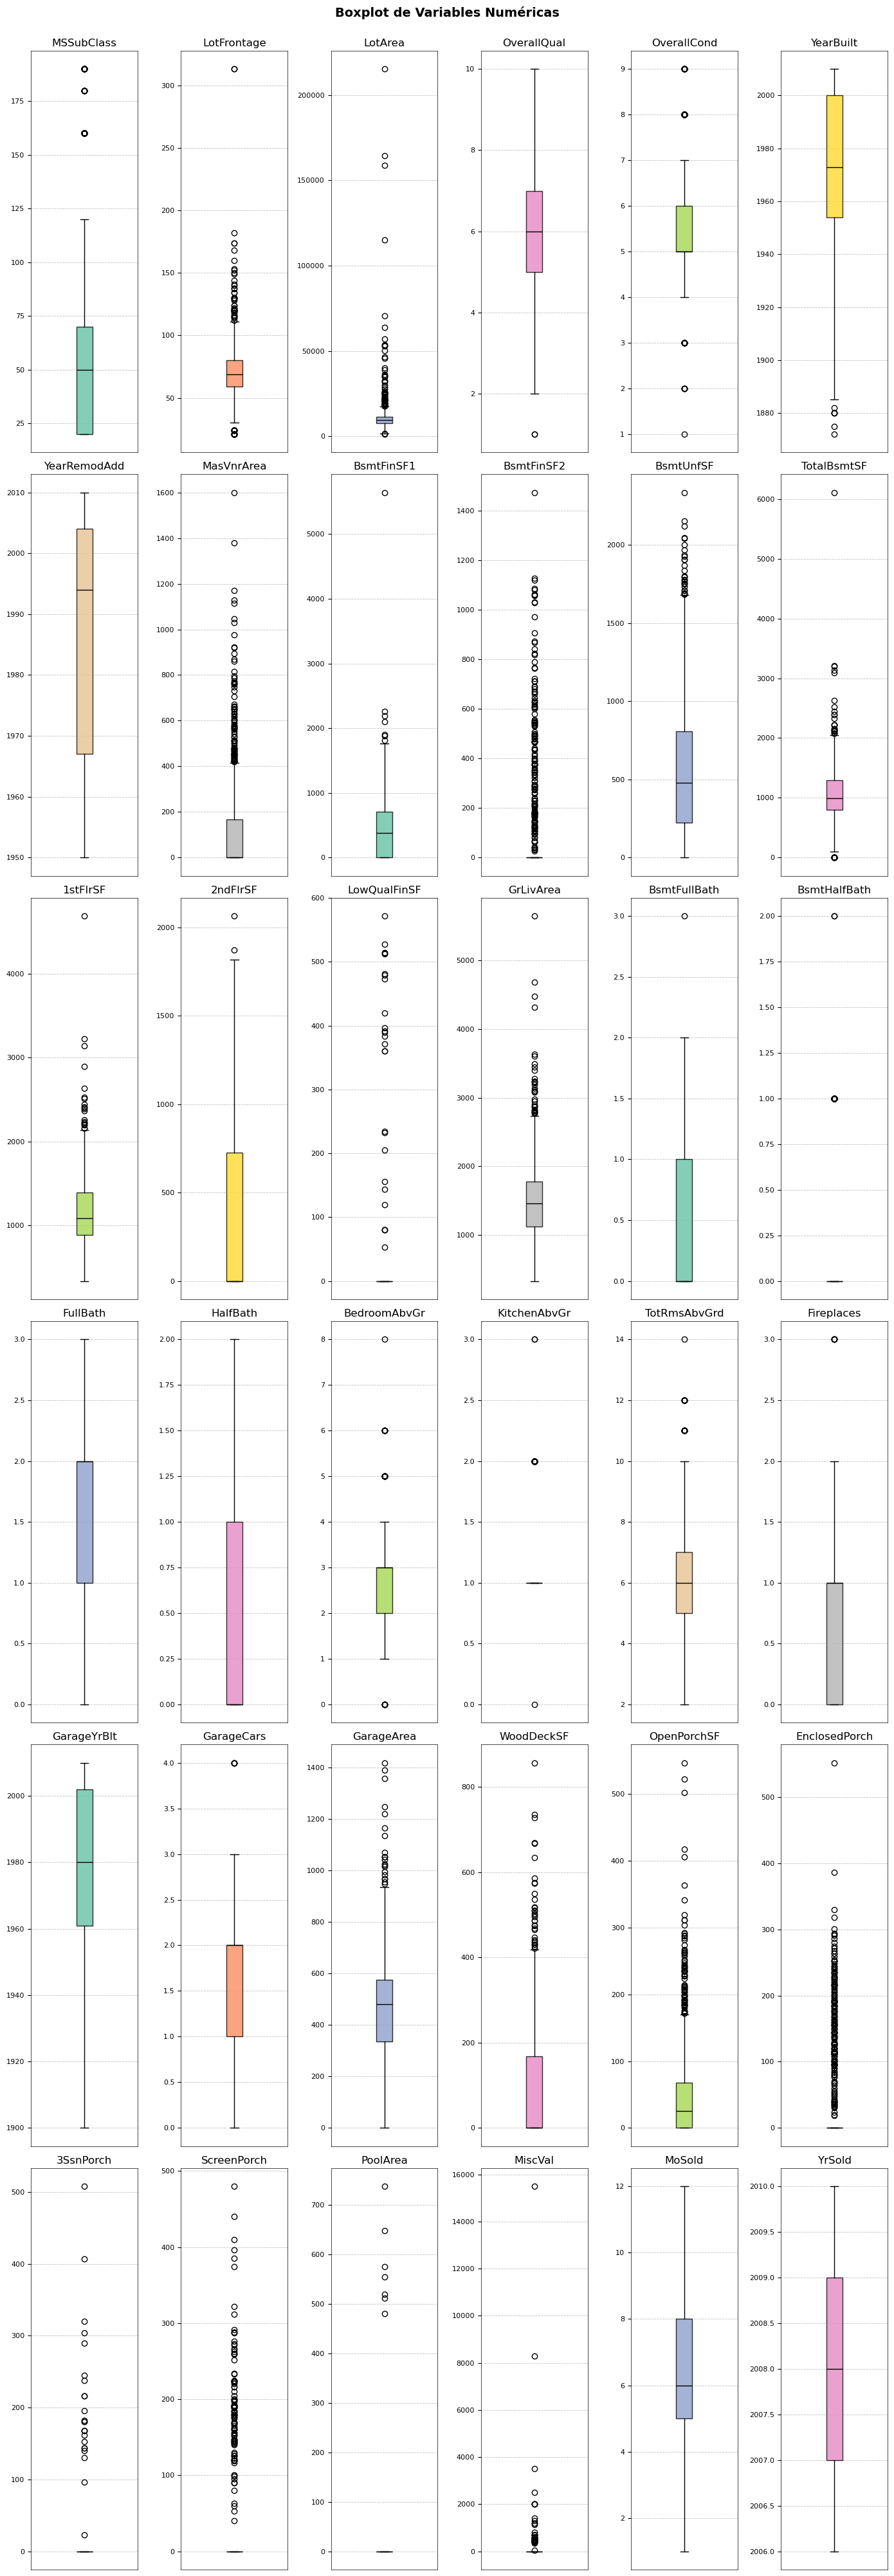

In [12]:
# Con personalización total
boxplots = utils.plot_boxplots(data_numeric, 
                    nrows=6,  # Forzar 1 fila 
                    ncols=6,  # Forzar 6 columnas
                    figsize=(14,40),  # Tamaño personalizado
                    color_palette='Set2',  # Paleta diferente
                    grid=True,  # Mostrar cuadrícula
                    title='Boxplot de Variables Numéricas',  # Título personalizado
                    median_color='black',  # Color de línea de mediana
                    box_alpha=0.8)  # Transparencia personalizada
plt.show()


Estadisticos de Outliers

In [13]:
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in data_numeric:
    outliers = utils.detect_outliers_iqr(data_numeric[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': data_numeric[column][~outliers].min(),
        'Upper Bound': data_numeric[column][~outliers].max()
    }

outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
MSSubClass,103.0,7.054795,20.0,120.0
LotFrontage,88.0,6.027397,30.0,111.0
LotArea,69.0,4.726027,1491.0,17671.0
OverallQual,2.0,0.136986,2.0,10.0
OverallCond,125.0,8.561644,4.0,7.0
YearBuilt,7.0,0.479452,1885.0,2010.0
YearRemodAdd,0.0,0.000000,1950.0,2010.0
MasVnrArea,96.0,6.575342,0.0,415.0
BsmtFinSF1,7.0,0.479452,0.0,1767.0
BsmtFinSF2,167.0,11.438356,0.0,0.0


##### **Consistencia en Valores**

In [14]:
import pandas as pd

def convertir_columnas_booleanas(df):
    """
    Convierte columnas con dos valores únicos en columnas booleanas en el DataFrame.
    
    Args:
        df (pd.DataFrame): El DataFrame a procesar.

    Returns:
        pd.DataFrame: El DataFrame con las columnas convertidas.
        list: Lista de las columnas que fueron convertidas.
    """
    # Lista de posibles pares de valores booleanos
    valores_columnas_booleanas_potenciales = [
        [0, 1],
        [0.0, 1.0],
        ["false", "true"],
        ["no", "yes"],
        ["no", "si"],
        ["N", "Y"],
    ]

    def _convertir_valor_a_booleano(x):
        """Convierte un valor a booleano si es posible."""
        if x in [0, 0.0, "false", "no", "N"]:
            return False
        if x in [1, 1.0, "true", "yes", "si", "Y"]:
            return True
        return x

    # Lista para rastrear columnas convertidas
    columnas_convertidas_booleanas = []

    for columna in df.columns:
        valores_unicos = df[columna].dropna().unique()

        # Si la columna tiene solo 2 valores únicos, intenta convertirla a booleana
        if len(valores_unicos) == 2:
            for posibilidad in valores_columnas_booleanas_potenciales:
                if set(valores_unicos) == set(posibilidad):
                    print(f"La columna '{columna}' es booleana. Será convertida.")
                    df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                    df[columna] = df[columna].astype("bool")
                    columnas_convertidas_booleanas.append(columna)
                    break

    return df, columnas_convertidas_booleanas


# Ejemplo de uso
# Carga de datos
# df = pd.read_csv("ruta_al_archivo.csv")  # Reemplaza con tu DataFrame

# Aplicar la función
df, columnas_convertidas = convertir_columnas_booleanas(train)

# Imprimir las columnas convertidas
print(f"Columnas convertidas a booleanas: {columnas_convertidas}")


La columna 'CentralAir' es booleana. Será convertida.
Columnas convertidas a booleanas: ['CentralAir']


In [15]:
# Porcentaje para considerar una columna como categórica
porcentaje_max_columnas_categoricas = 0.05
cant_filas_df = df.shape[0]

# Listas para almacenar resultados
columnas_a_excluir = []
columnas_convertidas_a_categoricas = []
columnas_convertidas_a_string = []

# Obtener columnas de tipo objeto o cadena
columnas_objeto_cadena = train.select_dtypes(include=['object', 'string']).columns.tolist()

for columna in columnas_objeto_cadena:
    valores_unicos = train[columna].dropna().unique().tolist()
    cantidad_unicos = len(valores_unicos)
    umbral = porcentaje_max_columnas_categoricas * cant_filas_df

    print(f"Columna '{columna}': {cantidad_unicos} valores únicos (Umbral: {umbral:.2f})")
    
    if cantidad_unicos <= umbral:
        # Convertir la columna a categórica
        print(f"-> Columna '{columna}' convertida a categórica.")
        df[columna] = df[columna].astype("category")
        columnas_convertidas_a_categoricas.append(columna)
    else:
        # Dejar la columna como string
        print(f"-> Columna '{columna}' se deja como string.")
        df[columna] = df[columna].astype("string")
        columnas_convertidas_a_string.append(columna)

    # Liberar memoria de la lista de valores únicos
    del valores_unicos

# Resultados finales
print("\nResumen:")
print(f"Total columnas analizadas: {len(columnas_objeto_cadena)}")
print(f"Columnas convertidas a categóricas: {len(columnas_convertidas_a_categoricas)}")
print(f"Columnas convertidas a string: {len(columnas_convertidas_a_string)}")
print(f"\nDetalle de columnas categóricas: {columnas_convertidas_a_categoricas}")
print(f"Detalle de columnas string: {columnas_convertidas_a_string}")


Columna 'MSZoning': 5 valores únicos (Umbral: 73.00)
-> Columna 'MSZoning' convertida a categórica.
Columna 'Street': 2 valores únicos (Umbral: 73.00)
-> Columna 'Street' convertida a categórica.
Columna 'Alley': 2 valores únicos (Umbral: 73.00)
-> Columna 'Alley' convertida a categórica.
Columna 'LotShape': 4 valores únicos (Umbral: 73.00)
-> Columna 'LotShape' convertida a categórica.
Columna 'LandContour': 4 valores únicos (Umbral: 73.00)
-> Columna 'LandContour' convertida a categórica.
Columna 'Utilities': 2 valores únicos (Umbral: 73.00)
-> Columna 'Utilities' convertida a categórica.
Columna 'LotConfig': 5 valores únicos (Umbral: 73.00)
-> Columna 'LotConfig' convertida a categórica.
Columna 'LandSlope': 3 valores únicos (Umbral: 73.00)
-> Columna 'LandSlope' convertida a categórica.
Columna 'Neighborhood': 25 valores únicos (Umbral: 73.00)
-> Columna 'Neighborhood' convertida a categórica.
Columna 'Condition1': 9 valores únicos (Umbral: 73.00)
-> Columna 'Condition1' convertida

##### **Correlaciones**

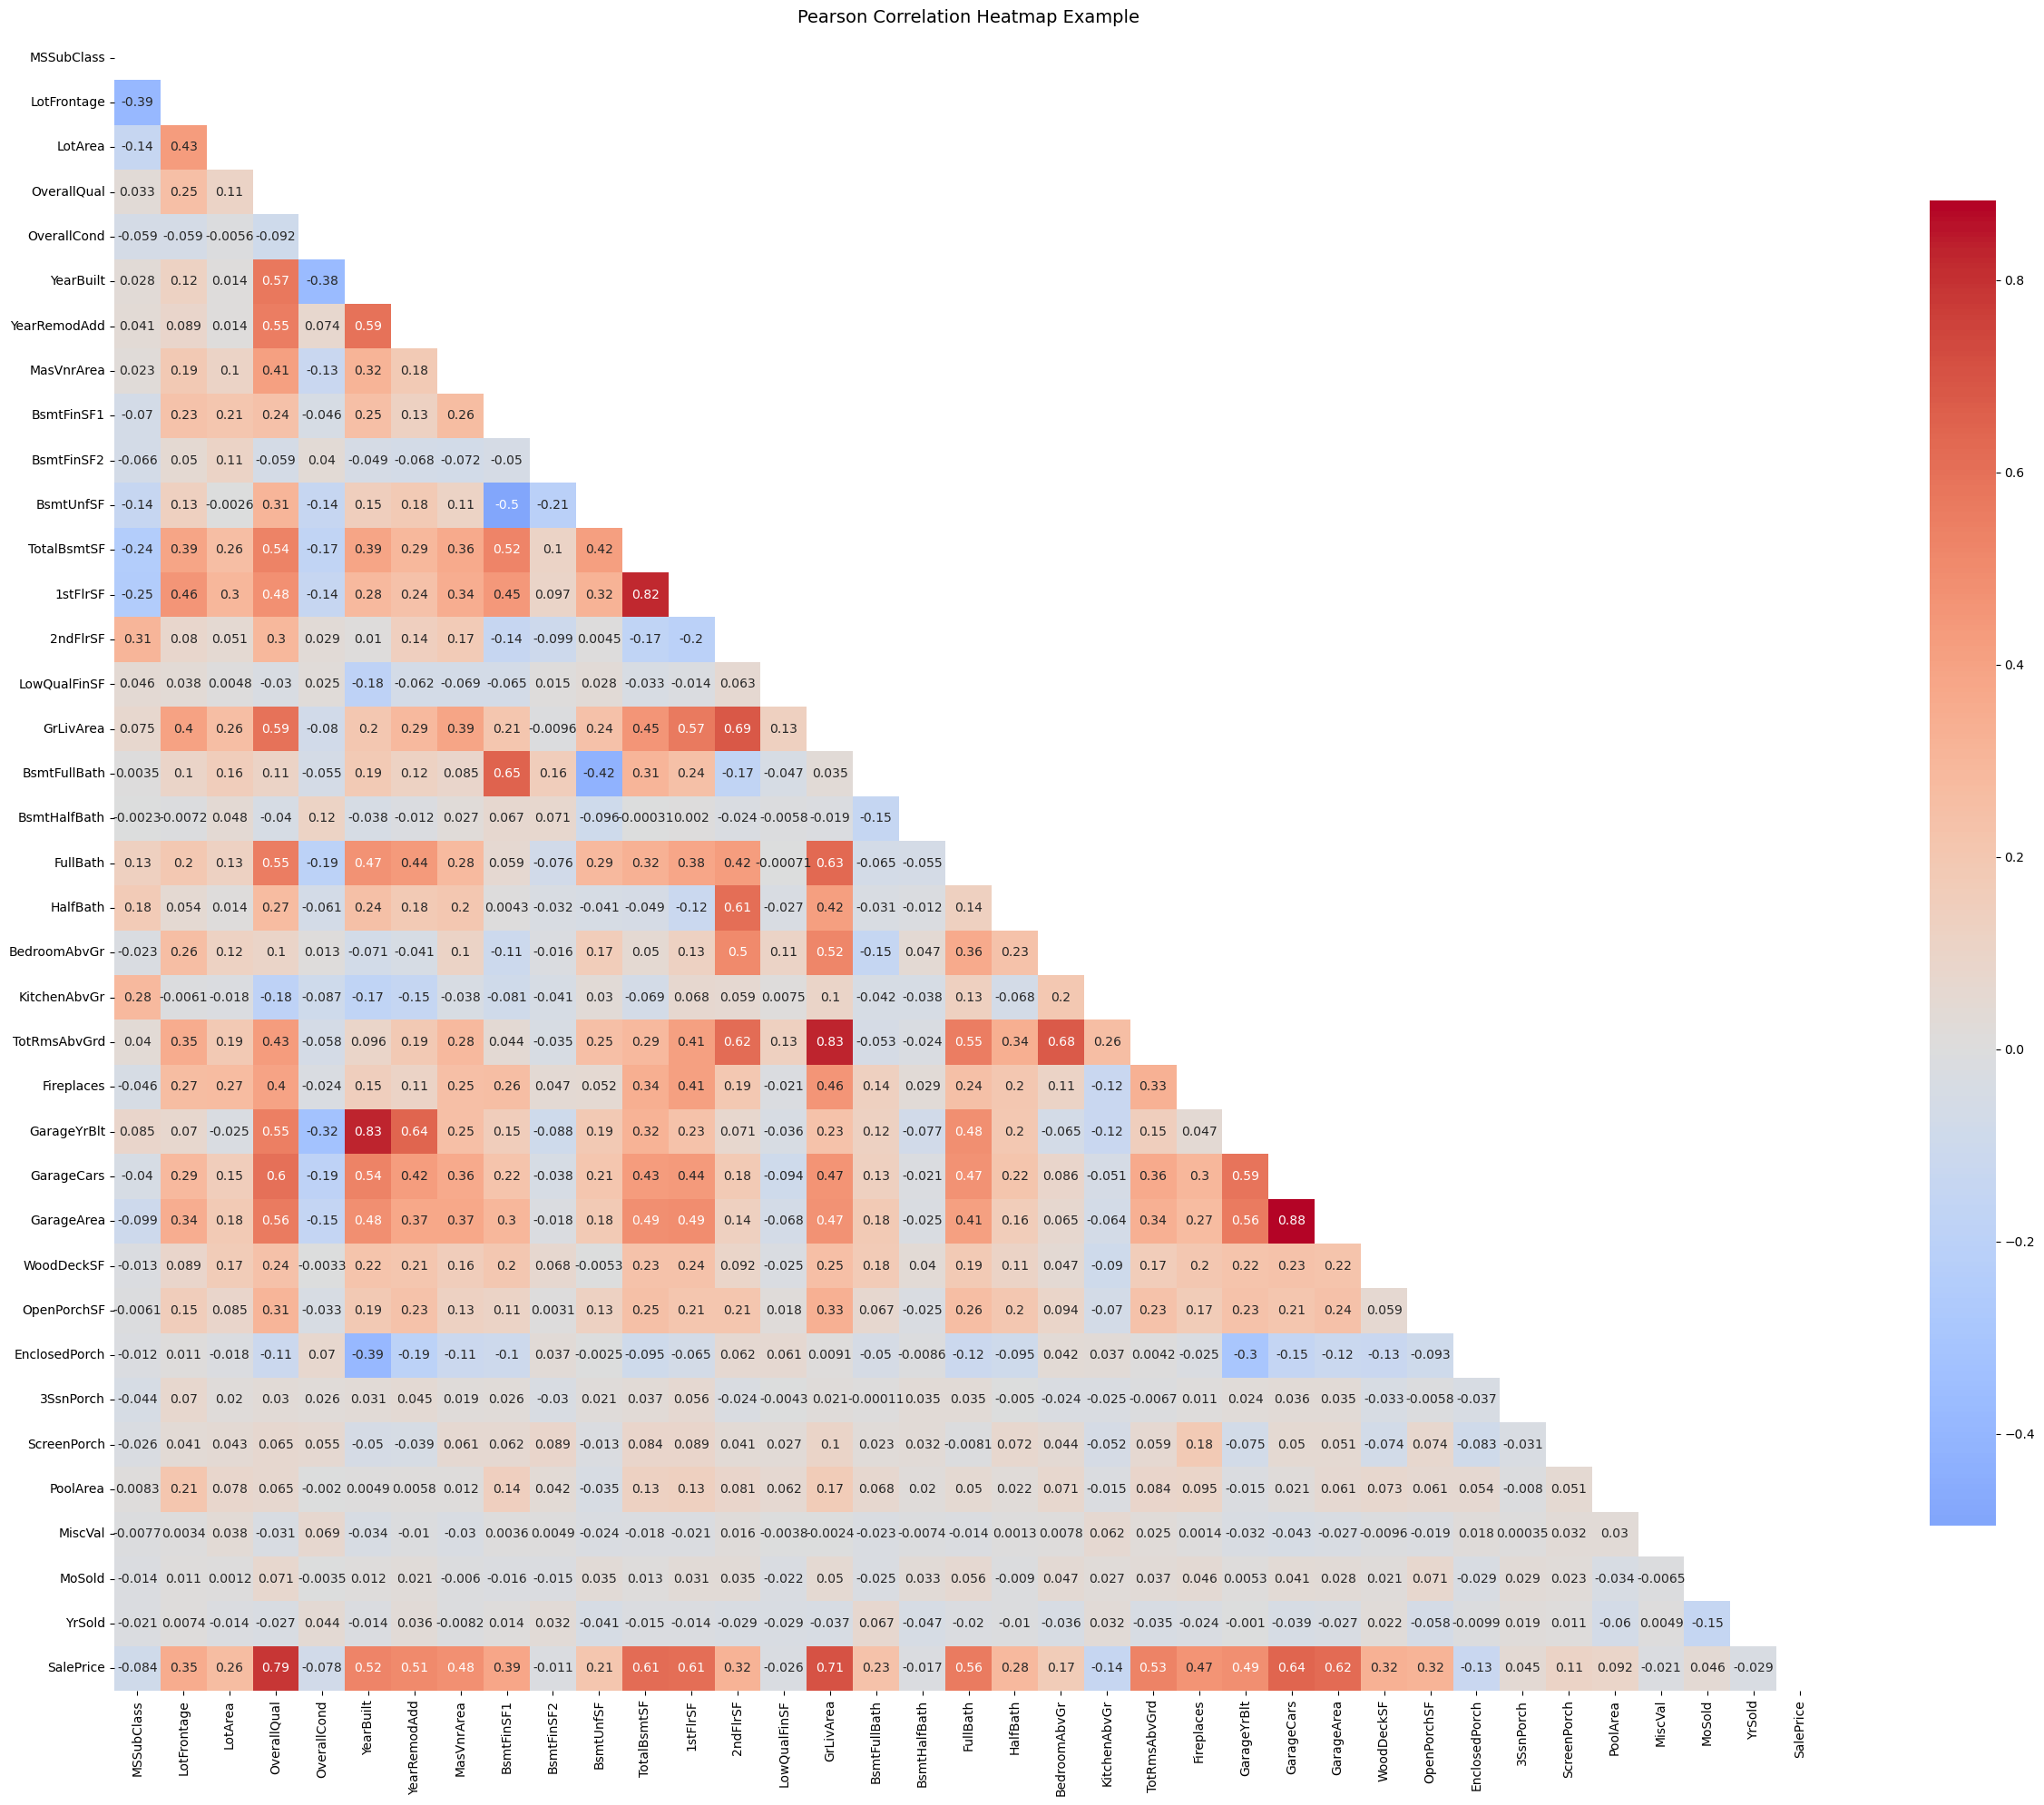

In [16]:
# Calcular la correlación de Pearson
pearson_corr = data_numeric.corr(method="pearson")

# Llamar a la función
utils.graph_pearson_correlation(
    pearson_corr, 
    title="Pearson Correlation Heatmap Example", 
    cmap='coolwarm', 
    figsize=(25, 20), 
    annot_size=10
)


Top Feactures correlacionadas con SalePrice

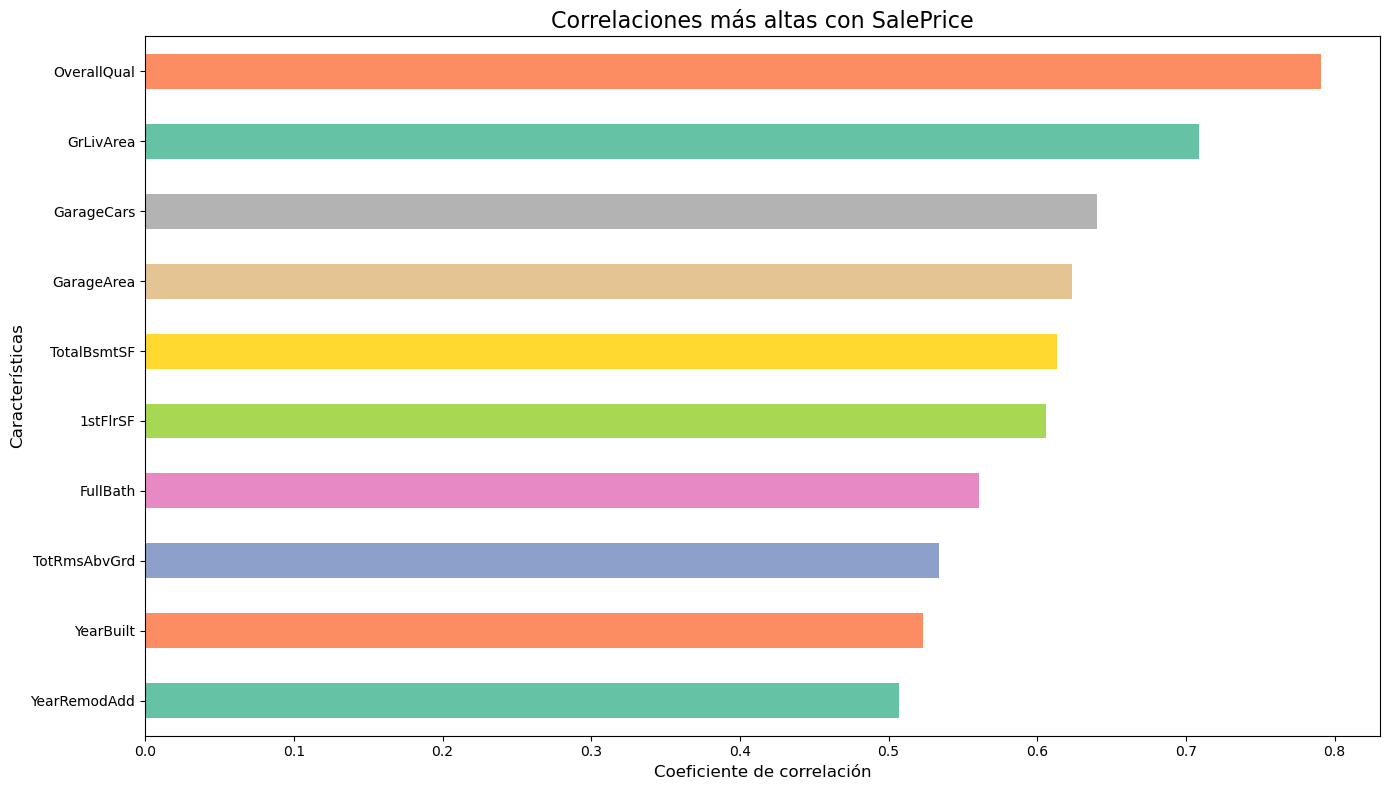

In [17]:
# Llamar la función con tus datos y personalizaciones
utils.plot_top_correlations(
    data=data_numeric, 
    target_column="SalePrice", 
    top_n=10, 
    palette="Set2", 
    figsize=(14, 8), 
    title="Correlaciones más altas con SalePrice", 
    xlabel="Coeficiente de correlación", 
    ylabel="Características", 
    grid=False, 
    grid_style={'linestyle': '--', 'linewidth': 0.6, 'color': 'black', 'alpha': 0.5}
)


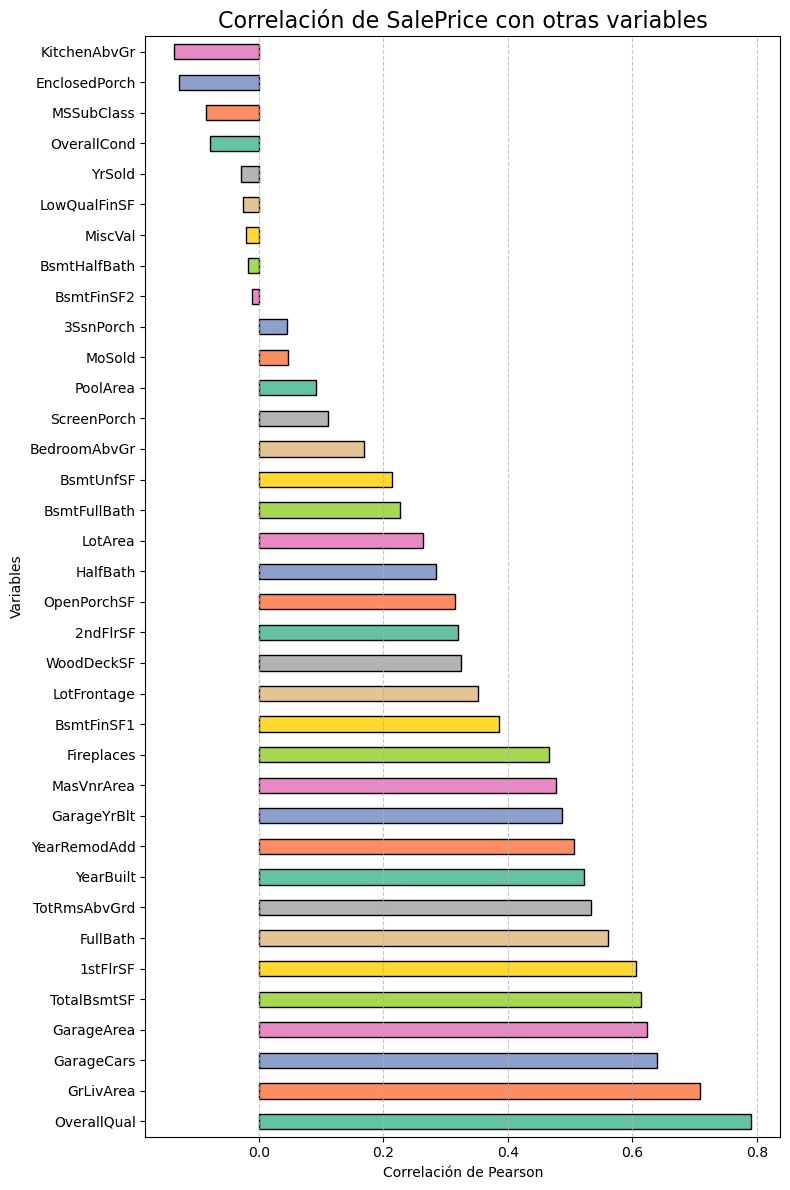

In [18]:
utils.plot_correlation_with_variable(
    data=train,                     # DataFrame con los datos
    target_column="SalePrice",      # Columna con la cual calcular la correlación
    correlation_method="pearson",   # Método de correlación (por defecto 'pearson')
    figsize=(8, 12),                # Tamaño de la figura
    color_palette="Set2",           # Paleta de colores (por defecto 'Set2')
    edgecolor="black",              # Color del borde de las barras
    grid=True,                      # Mostrar cuadrícula
    title="Correlación de SalePrice con otras variables"  # Título
)


### ***Limpieza***

In [19]:
# Eliminar las columnas MiscFeature, Alley y Fence
columns_to_drop = ['MiscFeature', 'Alley', 'Fence']
train.drop(columns=columns_to_drop,inplace=True)

In [20]:
# Validar si los valores nulos de PoolQC corresponden a PoolArea con valor 0
null_poolqc = train['PoolQC'].isnull()  # Identificar valores nulos en PoolQC
zero_poolarea = train['PoolArea'] == 0  # Identificar filas donde PoolArea es 0

# Comparar si las filas con PoolQC nulo coinciden con PoolArea igual a 0
validation = null_poolqc == zero_poolarea

# Resultado de la validación
if validation.all():
    print("Todos los valores nulos en 'PoolQC' corresponden a 'PoolArea' con valor 0.")
else:
    print("Existen inconsistencias entre 'PoolQC' nulo y 'PoolArea' con valor 0.")

# Mostrar las filas inconsistentes si las hay
inconsistencies = train[null_poolqc != zero_poolarea]
if not inconsistencies.empty:
    print("Filas inconsistentes encontradas:")
    print(inconsistencies[['PoolArea', 'PoolQC']])
else:
    print("No se encontraron inconsistencias.")

Todos los valores nulos en 'PoolQC' corresponden a 'PoolArea' con valor 0.
No se encontraron inconsistencias.


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   Utilities      1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  Condition1     1460 non-null   category
 12  Condition2     1460 non-null   category
 13  BldgType       1460 non-null   category
 14  HouseStyle     1460 non-null   category
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [22]:
# Agregar la categoría 'No Pool' a las categorías existentes
train['PoolQC'] = train['PoolQC'].cat.add_categories('No Pool')

# Reemplazar valores nulos en PoolQC por 'No Pool'
train['PoolQC'] = train['PoolQC'].fillna('No Pool')

# Verificar si quedan valores nulos en PoolQC
if train['PoolQC'].isnull().sum() == 0:
    print("Todos los valores nulos en 'PoolQC' fueron reemplazados por 'No Pool'.")
else:
    print("Aún hay valores nulos en 'PoolQC'. Verifica los datos.")


Todos los valores nulos en 'PoolQC' fueron reemplazados por 'No Pool'.


In [23]:
# Validar si los valores nulos de FireplaceQu corresponden a Fireplaces con valor 0
null_fireplacequ = train['FireplaceQu'].isnull()  # Identificar valores nulos en FireplaceQu
zero_fireplaces = train['Fireplaces'] == 0       # Identificar filas donde Fireplaces es 0

# Comparar si las filas con FireplaceQu nulo coinciden con Fireplaces igual a 0
validation = null_fireplacequ == zero_fireplaces

# Resultado de la validación
if validation.all():
    print("Todos los valores nulos en 'FireplaceQu' corresponden a 'Fireplaces' con valor 0.")
else:
    print("Existen inconsistencias entre 'FireplaceQu' nulo y 'Fireplaces' con valor 0.")

# Mostrar las filas inconsistentes si las hay
inconsistencies = train[null_fireplacequ != zero_fireplaces]
if not inconsistencies.empty:
    print("Filas inconsistentes encontradas:")
    print(inconsistencies[['Fireplaces', 'FireplaceQu']])
else:
    print("No se encontraron inconsistencias.")

Todos los valores nulos en 'FireplaceQu' corresponden a 'Fireplaces' con valor 0.
No se encontraron inconsistencias.


In [24]:
# Validar si los valores nulos de MasVnrType corresponden a MasVnrArea con valor 0
null_masvnrtype = train['MasVnrType'].isnull()  # Identificar valores nulos en MasVnrType
zero_masvnrarea = train['MasVnrArea'] == 0      # Identificar filas donde MasVnrArea es 0

# Comparar si las filas con MasVnrType nulo coinciden con MasVnrArea igual a 0
validation = null_masvnrtype == zero_masvnrarea

# Resultado de la validación
if validation.all():
    print("Todos los valores nulos en 'MasVnrType' corresponden a 'MasVnrArea' con valor 0.")
else:
    print("Existen inconsistencias entre 'MasVnrType' nulo y 'MasVnrArea' con valor 0.")

# Mostrar las filas inconsistentes si las hay
inconsistencies = train[null_masvnrtype != zero_masvnrarea]
if not inconsistencies.empty:
    print("Filas inconsistentes encontradas:")
    print(inconsistencies[['MasVnrArea', 'MasVnrType']])
else:
    print("No se encontraron inconsistencias.")

Existen inconsistencias entre 'MasVnrType' nulo y 'MasVnrArea' con valor 0.
Filas inconsistentes encontradas:
      MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
624        288.0        NaN
650          NaN        NaN
688          0.0    BrkFace
773          1.0        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1230         1.0        NaN
1241         0.0      Stone
1243         NaN        NaN
1278         NaN        NaN
1300       344.0        NaN
1334       312.0        NaN


In [25]:
# 3. Si MasVnrArea es nulo, dejar -1 "Unknown" en ambas columnas
mask_3 = train['MasVnrArea'].isnull()

# Check if -1 is already in the categories of 'MasVnrType'
if -1 not in train['MasVnrType'].cat.categories:
    train['MasVnrType'] = train['MasVnrType'].cat.add_categories([-1])

# Now apply the replacement
train.loc[mask_3, ['MasVnrType', 'MasVnrArea']] = -1

# Verificación de resultados
print("Reemplazos realizados:")
print(train[['MasVnrArea', 'MasVnrType']].head())


Reemplazos realizados:
   MasVnrArea MasVnrType
0       196.0    BrkFace
1         0.0        NaN
2       162.0    BrkFace
3         0.0        NaN
4       350.0    BrkFace


In [26]:
# Validar si los valores nulos de LotFrontage tienen relación con LotArea
null_lotfrontage = train['LotFrontage'].isnull()  # Identificar valores nulos en LotFrontage
zero_lotarea = train['LotArea'] == 0             # Identificar filas donde LotArea es 0

# Comparar si las filas con LotFrontage nulo coinciden con LotArea igual a 0
validation = null_lotfrontage == zero_lotarea

# Resultado de la validación
if validation.all():
    print("Todos los valores nulos en 'LotFrontage' corresponden a 'LotArea' con valor 0.")
else:
    print("Existen inconsistencias entre 'LotFrontage' nulo y 'LotArea' con valor 0.")

# Mostrar las filas inconsistentes si las hay
inconsistencies = train[null_lotfrontage != zero_lotarea]
if not inconsistencies.empty:
    print("Filas inconsistentes encontradas:")
    print(inconsistencies[['LotFrontage', 'LotArea']])
else:
    print("No se encontraron inconsistencias.")

Existen inconsistencias entre 'LotFrontage' nulo y 'LotArea' con valor 0.
Filas inconsistentes encontradas:
      LotFrontage  LotArea
7             NaN    10382
12            NaN    12968
14            NaN    10920
16            NaN    11241
24            NaN     8246
...           ...      ...
1429          NaN    12546
1431          NaN     4928
1441          NaN     4426
1443          NaN     8854
1446          NaN    26142

[259 rows x 2 columns]


In [27]:
# Caso 1: Si LotArea > 0 y LotFrontage es nulo, dejar "Unknown" en LotFrontage
mask_case1 = (train['LotArea'] > 0) & (train['LotFrontage'].isnull())
train.loc[mask_case1, 'LotFrontage'] = -1 #"Unknown"

# Caso 2: Si LotArea es 0, dejar "No Frontage" en LotFrontage
mask_case2 = train['LotArea'] == 0
train.loc[mask_case2, 'LotFrontage'] = 0 # "No Frontage"

# Verificación de resultados
print("Reemplazos realizados:")
print(train[['LotArea', 'LotFrontage']].head())

Reemplazos realizados:
   LotArea  LotFrontage
0     8450         65.0
1     9600         80.0
2    11250         68.0
3     9550         60.0
4    14260         84.0


In [28]:

# Validar si los valores nulos en las columnas relacionadas con el garaje corresponden a GarageArea igual a 0
garage_columns = ['GarageType', 'GarageCond', 'GarageYrBlt', 'GarageFinish', 'GarageQual']
null_garage_columns = train[garage_columns].isnull().all(axis=1)  # Todas las columnas de garaje nulas
zero_garagearea = train['GarageArea'] == 0  # GarageArea igual a 0

# Comparar si las filas con GarageArea igual a 0 coinciden con columnas de garaje nulas
validation = null_garage_columns == zero_garagearea

# Resultado de la validación
if validation.all():
    print("Todos los valores nulos en columnas de garaje corresponden a 'GarageArea' con valor 0.")
else:
    print("Existen inconsistencias entre valores nulos en columnas de garaje y 'GarageArea' con valor 0.")

# Mostrar las filas inconsistentes si las hay
inconsistencies = train[null_garage_columns != zero_garagearea]
if not inconsistencies.empty:
    print("Filas inconsistentes encontradas:")
    print(inconsistencies[['GarageArea'] + garage_columns])
else:
    print("No se encontraron inconsistencias.")

Todos los valores nulos en columnas de garaje corresponden a 'GarageArea' con valor 0.
No se encontraron inconsistencias.


In [29]:
# Lista de columnas relacionadas con el garaje, excluyendo GarageYrBlt
garage_columns = ['GarageType', 'GarageCond', 'GarageFinish', 'GarageQual']

# Identificar las filas donde GarageArea es 0
mask_no_garage = train['GarageArea'] == 0

# Asegurarse de que 'No Garage' esté en las categorías de las columnas de garaje
for col in garage_columns:
    if 'No Garage' not in train[col].cat.categories:
        train[col] = train[col].cat.add_categories(['No Garage'])

# Reemplazar los valores nulos en las columnas de garaje con "No Garage" para las filas identificadas
train.loc[mask_no_garage, garage_columns] = train.loc[mask_no_garage, garage_columns].fillna("No Garage")

# Manejar GarageYrBlt por separado (columna numérica), asignando 0 como indicador de "No Garage"
train.loc[mask_no_garage, 'GarageYrBlt'] = train.loc[mask_no_garage, 'GarageYrBlt'].fillna(0)

# Verificar si el reemplazo fue realizado correctamente
remaining_nulls = train.loc[mask_no_garage, garage_columns + ['GarageYrBlt']].isnull().sum().sum()
if remaining_nulls == 0:
    print("Todos los valores nulos en las columnas de garaje fueron reemplazados correctamente para filas con GarageArea = 0.")
else:
    print(f"Aún quedan {remaining_nulls} valores nulos en las columnas de garaje para filas con GarageArea = 0.")


Todos los valores nulos en las columnas de garaje fueron reemplazados correctamente para filas con GarageArea = 0.


In [30]:
train.isna().sum().head(20)

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
dtype: int64

In [31]:
# Calcular BsmtFinSF como la suma de BsmtFinSF1, BsmtFinSF2 y BsmtUnfSF
train['BsmtFinSF'] = train['BsmtFinSF1'] + train['BsmtFinSF2'] + train['BsmtUnfSF']

# 1. Validar nulos en BsmtQual, BsmtCond, y BsmtExposure cuando BsmtFinSF es 0
bsmt_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure']
null_bsmt_columns = train[bsmt_columns].isnull().all(axis=1)  # Todas las columnas del sótano son nulas
zero_bsmtfinsf = train['BsmtFinSF'] == 0  # BsmtFinSF igual a 0

# Comparar si las filas con BsmtFinSF igual a 0 coinciden con columnas del sótano nulas
validation_1 = null_bsmt_columns == zero_bsmtfinsf

# Mostrar resultados para la primera validación
if validation_1.all():
    print("Todos los valores nulos en 'BsmtQual', 'BsmtCond', y 'BsmtExposure' corresponden a 'BsmtFinSF' con valor 0.")
else:
    print("Existen inconsistencias entre valores nulos en 'BsmtQual', 'BsmtCond', 'BsmtExposure' y 'BsmtFinSF' con valor 0.")
    inconsistencies_1 = train[null_bsmt_columns != zero_bsmtfinsf]
    print(inconsistencies_1[['BsmtFinSF'] + bsmt_columns])

# 2. Validar nulos en BsmtFinType1 cuando BsmtFinSF1 es 0
null_bsmtfin1 = train['BsmtFinType1'].isnull()  # BsmtFinType1 es nulo
zero_bsmtfinsf1 = train['BsmtFinSF1'] == 0  # BsmtFinSF1 igual a 0

# Comparar si las filas con BsmtFinSF1 igual a 0 coinciden con BsmtFinType1 nulo
validation_2 = null_bsmtfin1 == zero_bsmtfinsf1

# Mostrar resultados para la segunda validación
if validation_2.all():
    print("Todos los valores nulos en 'BsmtFinType1' corresponden a 'BsmtFinSF1' con valor 0.")
else:
    print("Existen inconsistencias entre valores nulos en 'BsmtFinType1' y 'BsmtFinSF1' con valor 0.")
    inconsistencies_2 = train[null_bsmtfin1 != zero_bsmtfinsf1]
    print(inconsistencies_2[['BsmtFinSF1', 'BsmtFinType1']])

# 3. Validar nulos en BsmtFinType2 cuando BsmtFinSF2 es 0
null_bsmtfin2 = train['BsmtFinType2'].isnull()  # BsmtFinType2 es nulo
zero_bsmtfinsf2 = train['BsmtFinSF2'] == 0  # BsmtFinSF2 igual a 0

# Comparar si las filas con BsmtFinSF2 igual a 0 coinciden con BsmtFinType2 nulo
validation_3 = null_bsmtfin2 == zero_bsmtfinsf2

# Mostrar resultados para la tercera validación
if validation_3.all():
    print("Todos los valores nulos en 'BsmtFinType2' corresponden a 'BsmtFinSF2' con valor 0.")
else:
    print("Existen inconsistencias entre valores nulos en 'BsmtFinType2' y 'BsmtFinSF2' con valor 0.")
    inconsistencies_3 = train[null_bsmtfin2 != zero_bsmtfinsf2]
    print(inconsistencies_3[['BsmtFinSF2', 'BsmtFinType2']])

Todos los valores nulos en 'BsmtQual', 'BsmtCond', y 'BsmtExposure' corresponden a 'BsmtFinSF' con valor 0.
Existen inconsistencias entre valores nulos en 'BsmtFinType1' y 'BsmtFinSF1' con valor 0.
      BsmtFinSF1 BsmtFinType1
8              0          Unf
13             0          Unf
15             0          Unf
20             0          Unf
21             0          Unf
...          ...          ...
1448           0          Unf
1450           0          Unf
1451           0          Unf
1453           0          Unf
1455           0          Unf

[430 rows x 2 columns]
Existen inconsistencias entre valores nulos en 'BsmtFinType2' y 'BsmtFinSF2' con valor 0.
      BsmtFinSF2 BsmtFinType2
0              0          Unf
1              0          Unf
2              0          Unf
3              0          Unf
4              0          Unf
...          ...          ...
1452           0          Unf
1453           0          Unf
1454           0          Unf
1455           0          Un

In [32]:
# Reemplazar valores nulos en BsmtQual, BsmtCond, y BsmtExposure con "No Bss" cuando BsmtFinSF es 0
bsmt_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure']

# Asegurarse de que "No Bss" esté en las categorías de las columnas categóricas
for col in bsmt_columns:
    train[col] = train[col].cat.add_categories("No Bss")

mask_bsmtfinsf_zero = train['BsmtFinSF'] == 0
train.loc[mask_bsmtfinsf_zero, bsmt_columns] = train.loc[mask_bsmtfinsf_zero, bsmt_columns].fillna("No Bss")

# Reemplazar valores nulos en BsmtFinType1 con "Unf" cuando BsmtFinSF1 es 0
mask_bsmtfinsf1_zero = train['BsmtFinSF1'] == 0
train.loc[mask_bsmtfinsf1_zero, 'BsmtFinType1'] = train.loc[mask_bsmtfinsf1_zero, 'BsmtFinType1'].fillna("Unf")

# Reemplazar valores nulos en BsmtFinType2 con "Unf" cuando BsmtFinSF2 es 0
mask_bsmtfinsf2_zero = train['BsmtFinSF2'] == 0
train.loc[mask_bsmtfinsf2_zero, 'BsmtFinType2'] = train.loc[mask_bsmtfinsf2_zero, 'BsmtFinType2'].fillna("Unf")

# Verificación
print("Verificando reemplazos:")
print("Valores únicos en BsmtQual:", train['BsmtQual'].unique())
print("Valores únicos en BsmtCond:", train['BsmtCond'].unique())
print("Valores únicos en BsmtExposure:", train['BsmtExposure'].unique())
print("Valores únicos en BsmtFinType1:", train['BsmtFinType1'].unique())
print("Valores únicos en BsmtFinType2:", train['BsmtFinType2'].unique())


Verificando reemplazos:
Valores únicos en BsmtQual: ['Gd', 'TA', 'Ex', 'No Bss', 'Fa']
Categories (5, object): ['Ex', 'Fa', 'Gd', 'TA', 'No Bss']
Valores únicos en BsmtCond: ['TA', 'Gd', 'No Bss', 'Fa', 'Po']
Categories (5, object): ['Fa', 'Gd', 'Po', 'TA', 'No Bss']
Valores únicos en BsmtExposure: ['No', 'Gd', 'Mn', 'Av', 'No Bss', NaN]
Categories (5, object): ['Av', 'Gd', 'Mn', 'No', 'No Bss']
Valores únicos en BsmtFinType1: ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ']
Categories (6, object): ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf']
Valores únicos en BsmtFinType2: ['Unf', 'BLQ', 'ALQ', 'Rec', 'LwQ', 'GLQ', NaN]
Categories (6, object): ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf']


In [33]:
# Seleccionar filas donde BsmtFinType2 es nulo
bsmtfin_null_data = train[train['BsmtFinType2'].isnull()]
# Mostrar las columnas asociadas al sótano para las filas seleccionadas
bsmt_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFinType1', 'BsmtFinType2']
print("Datos asociados al sótano donde 'BsmtFinType2' es nulo:")
print(bsmtfin_null_data[bsmt_columns])

Datos asociados al sótano donde 'BsmtFinType2' es nulo:
    BsmtQual BsmtCond BsmtExposure  BsmtFinSF  BsmtFinSF1  BsmtFinSF2  \
332       Gd       TA           No       3206        1124         479   

     BsmtUnfSF BsmtFinType1 BsmtFinType2  
332       1603          GLQ          NaN  


In [34]:
# Identificar todas las columnas relacionadas con el sótano
bsmt_columns = [col for col in train.columns if col.startswith('Bsmt')]

# Asegurarse de que "Unknown" sea una categoría válida en las columnas categóricas
for col in bsmt_columns:
    if train[col].dtype.name == 'category':
        train[col] = train[col].cat.add_categories('Unknown')

# Reemplazar valores nulos en las columnas relacionadas con el sótano con "Unknown"
train[bsmt_columns] = train[bsmt_columns].fillna("Unknown")

# Verificar si quedan valores nulos en las columnas del sótano
remaining_nulls = train[bsmt_columns].isnull().sum().sum()
if remaining_nulls == 0:
    print("Todos los valores faltantes en las columnas relacionadas con el sótano fueron reemplazados por 'Unknown'.")
else:
    print(f"Aún quedan {remaining_nulls} valores nulos en las columnas del sótano.")


Todos los valores faltantes en las columnas relacionadas con el sótano fueron reemplazados por 'Unknown'.


In [35]:
# Agregar "Unknown" a las categorías de la columna 'Electrical', si es necesario
if 'Unknown' not in train['Electrical'].cat.categories:
    train['Electrical'] = train['Electrical'].cat.add_categories('Unknown')

# Reemplazar valores nulos en la columna 'Electrical' por "Unknown"
train['Electrical'] = train['Electrical'].fillna("Unknown")

# Verificar si quedan valores nulos en 'Electrical'
if train['Electrical'].isnull().sum() == 0:
    print("Todos los valores nulos en 'Electrical' fueron reemplazados por 'Unknown'.")
else:
    print("Aún quedan valores nulos en 'Electrical'. Verifica los datos.")


Todos los valores nulos en 'Electrical' fueron reemplazados por 'Unknown'.


### ***Modeling***

In [36]:
categorical_columns = train.select_dtypes(include=['category', 'object']).columns

In [37]:
# Lista para almacenar los resultados de ANOVA
anova_results = []

# Realizar ANOVA para cada variable categórica
for column in categorical_columns:
    groups = [group["SalePrice"].dropna() for _, group in train.groupby(column, observed=False)]  # Set observed=False explicitly
    anova_result = f_oneway(*groups)
    anova_results.append({
        "column": column,
        "F-Statistic": anova_result.statistic,
        "p-value": anova_result.pvalue
    })

# Crear un DataFrame con los resultados de ANOVA
anova_df = pd.DataFrame(anova_results)

# Filtrar las variables con p-valor < 0.05
significant_anova = anova_df[anova_df["p-value"] < 0.05]["column"].tolist()

print("\nVariables categóricas significativas para el modelo:")
print(significant_anova)

# Mostrar los resultados
print("Resultados de ANOVA:")
anova_df

# Resultados de ANOVA ordenados por p-valor
sorted_anova_df = anova_df.sort_values("p-value")
print("\nResultados de ANOVA ordenados por p-valor:")
sorted_anova_df


c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):



Variables categóricas significativas para el modelo:
['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtExposure', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'SaleType', 'SaleCondition']
Resultados de ANOVA:

Resultados de ANOVA ordenados por p-valor:


,column,F-Statistic,p-value
7,Neighborhood,71.784865,1.558600e-225
17,ExterQual,443.334831,1.439551e-204
28,KitchenQual,407.806352,3.032213e-192
32,GarageFinish,213.867028,6.228747e-115
19,Foundation,100.253851,5.791895e-91
31,GarageType,80.379992,6.117026e-87
26,HeatingQC,88.394462,2.667062e-67
22,BsmtExposure,51.437591,3.289635e-49
38,SaleCondition,45.578428,7.988268e-44
14,Exterior1st,18.611743,2.586089e-43


Tabla de correlaciones:
           Column  Correlation  Absolute Correlation
0       SalePrice     1.000000              1.000000
1     OverallQual     0.790982              0.790982
2       GrLivArea     0.708624              0.708624
3      GarageCars     0.640409              0.640409
4      GarageArea     0.623431              0.623431
5     TotalBsmtSF     0.613581              0.613581
6        1stFlrSF     0.605852              0.605852
7        FullBath     0.560664              0.560664
8    TotRmsAbvGrd     0.533723              0.533723
9       YearBuilt     0.522897              0.522897
10   YearRemodAdd     0.507101              0.507101
11    GarageYrBlt     0.486362              0.486362
12     MasVnrArea     0.477493              0.477493
13     Fireplaces     0.466929              0.466929
14     BsmtFinSF1     0.386420              0.386420
15    LotFrontage     0.351799              0.351799
16     WoodDeckSF     0.324413              0.324413
17       2ndFlrSF     

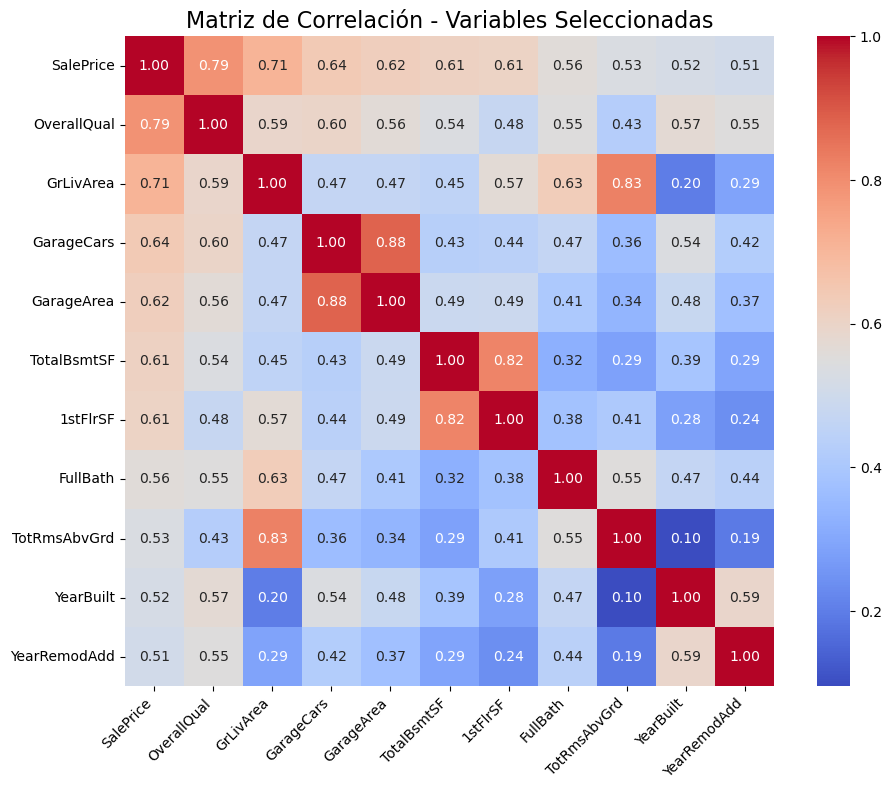

In [38]:
# Calcular la correlación de Pearson con SalePrice
if 'SalePrice' in data_numeric.columns:
    correlation_with_saleprice = data_numeric.corr(method="pearson")['SalePrice'].sort_values(ascending=False)
    
    # Crear un DataFrame con los resultados de la correlación
    correlation_df = pd.DataFrame({
        "Column": correlation_with_saleprice.index,
        "Correlation": correlation_with_saleprice.values
    })
    correlation_df["Absolute Correlation"] = correlation_df["Correlation"].abs()
    
    # Filtrar las columnas con correlación absoluta mayor a 0.4
    significant_columns = correlation_df[correlation_df["Absolute Correlation"] > 0.5]["Column"].tolist()
    
    # Mostrar la tabla de correlaciones
    print("Tabla de correlaciones:")
    print(correlation_df)
    
    # Mostrar las columnas seleccionadas
    print("\nColumnas con correlación absoluta mayor a 0.4:")
    print(significant_columns)
    
    # Crear un gráfico de calor de las correlaciones seleccionadas
    significant_numeric_columns = data_numeric[significant_columns]
    plt.figure(figsize=(10, 8))
    sns.heatmap(significant_numeric_columns.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
    plt.title("Matriz de Correlación - Variables Seleccionadas", fontsize=16)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'SalePrice' no está en el dataset.")

In [39]:
#train['GrLivAreaByTotRmsAbvGrd'] = train.GrLivArea/train.TotRmsAbvGrd
#significant_columns.append('GrLivAreaByTotRmsAbvGrd')
# Columnas a eliminar
columns_to_remove = ['BsmtFinSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd']
# Filtrar las columnas
filtered_columns = [col for col in significant_columns if col not in columns_to_remove]
results = []
for column in filtered_columns:
    if column != 'SalePrice':
        r, p_value = pearsonr(train[column], train['SalePrice'])
        results.append({"Variable": column, "Correlation": r, "P-Value": p_value})

# Crear un DataFrame con los resultados
correlation_results = pd.DataFrame(results)

# Filtrar variables con correlaciones significativas
significant_correlations = correlation_results[correlation_results["P-Value"] < 0.05]

# Mostrar los resultados
print("Correlaciones significativas:")
print(significant_correlations)

Correlaciones significativas:
       Variable  Correlation        P-Value
0   OverallQual     0.790982  2.185675e-313
1     GrLivArea     0.708624  4.518034e-223
2    GarageCars     0.640409  2.498644e-169
3    GarageArea     0.623431  5.265038e-158
4   TotalBsmtSF     0.613581  9.484229e-152
5      FullBath     0.560664  1.236470e-121
6  TotRmsAbvGrd     0.533723  2.772281e-108


In [40]:
# Variables predictoras y target
target = "SalePrice"
significant_columns = significant_anova + significant_correlations.Variable.values.tolist() + [target]
predictors = train[significant_columns].columns.drop(target)  # Todas las columnas excepto SalePrice
X = train[predictors]
y = train[target]

In [41]:
test = pd.read_csv("test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [42]:
# Asegúrate de que `train` está preparado antes de usar este código
# Variables predictoras y target
target = "SalePrice"
predictors = train.columns.drop(target)  # Todas las columnas excepto SalePrice

# Dividir las variables categóricas y numéricas
categorical_columns = train.select_dtypes(include=["category", "object"]).columns
numerical_columns = train.select_dtypes(include=["int32","int64", "float64"]).columns.drop(target)

# Convertir las categóricas a One-Hot Encoding
train_encoded = pd.get_dummies(train, columns=categorical_columns, drop_first=True)

# Preparar las variables X (predictoras) y y (target)
X = train_encoded.drop(columns=[target])
y = train_encoded[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal Múltiple
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicciones con el modelo de Regresión Lineal
y_pred_linear = linear_model.predict(X_test)

# Modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones con el modelo de Random Forest
y_pred_rf = rf_model.predict(X_test)

In [43]:
# Evaluación del modelo de Regresión Lineal
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_rmse = np.sqrt(linear_mse)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print(f"Regresión Lineal Múltiple:")
print(f"MSE: {linear_mse:.2f}")
print(f"RMSE: {linear_rmse:.2f}")
print(f"MAE: {linear_mae:.2f}")
print(f"R^2: {linear_r2:.2f}\n")

# Evaluación del modelo de Random Forest
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor:")
print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE: {rf_mae:.2f}")
print(f"R^2: {rf_r2:.2f}\n")

Regresión Lineal Múltiple:
MSE: 1817719294.82
RMSE: 42634.72
MAE: 19867.13
R^2: 0.76

Random Forest Regressor:
MSE: 817870617.05
RMSE: 28598.44
MAE: 17552.73
R^2: 0.89



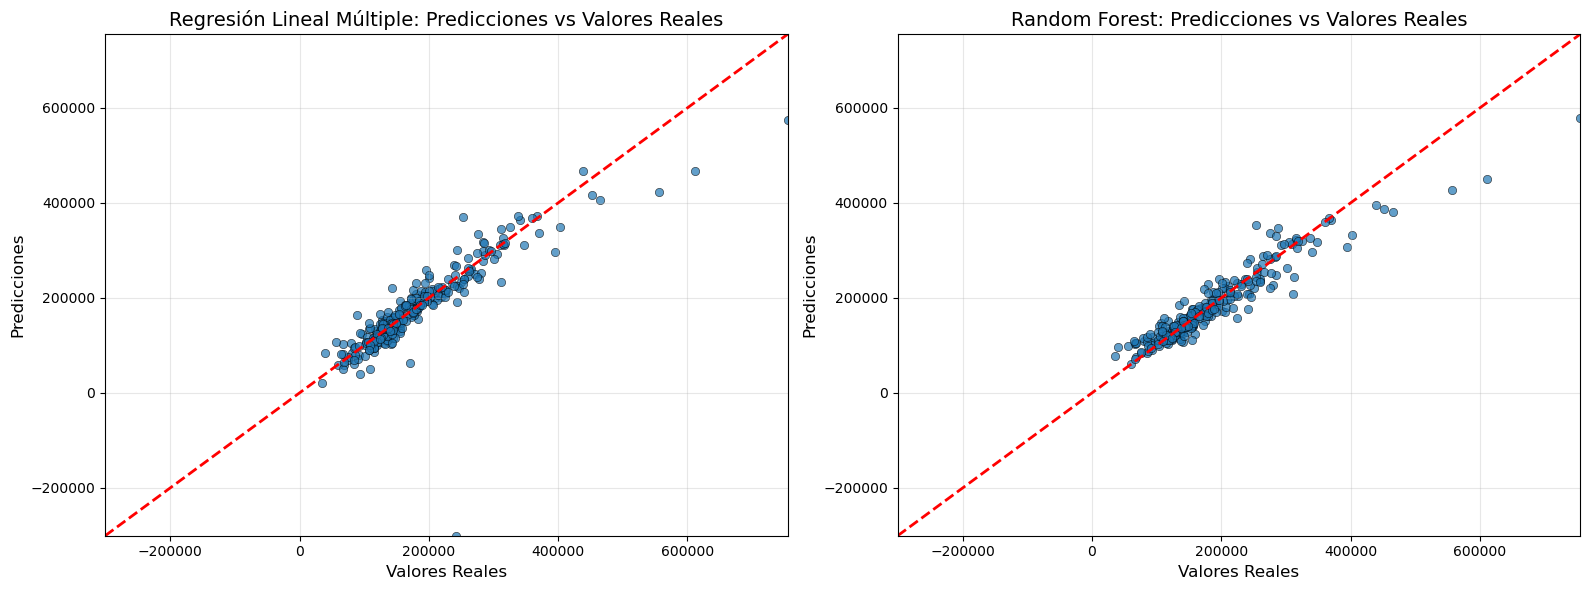

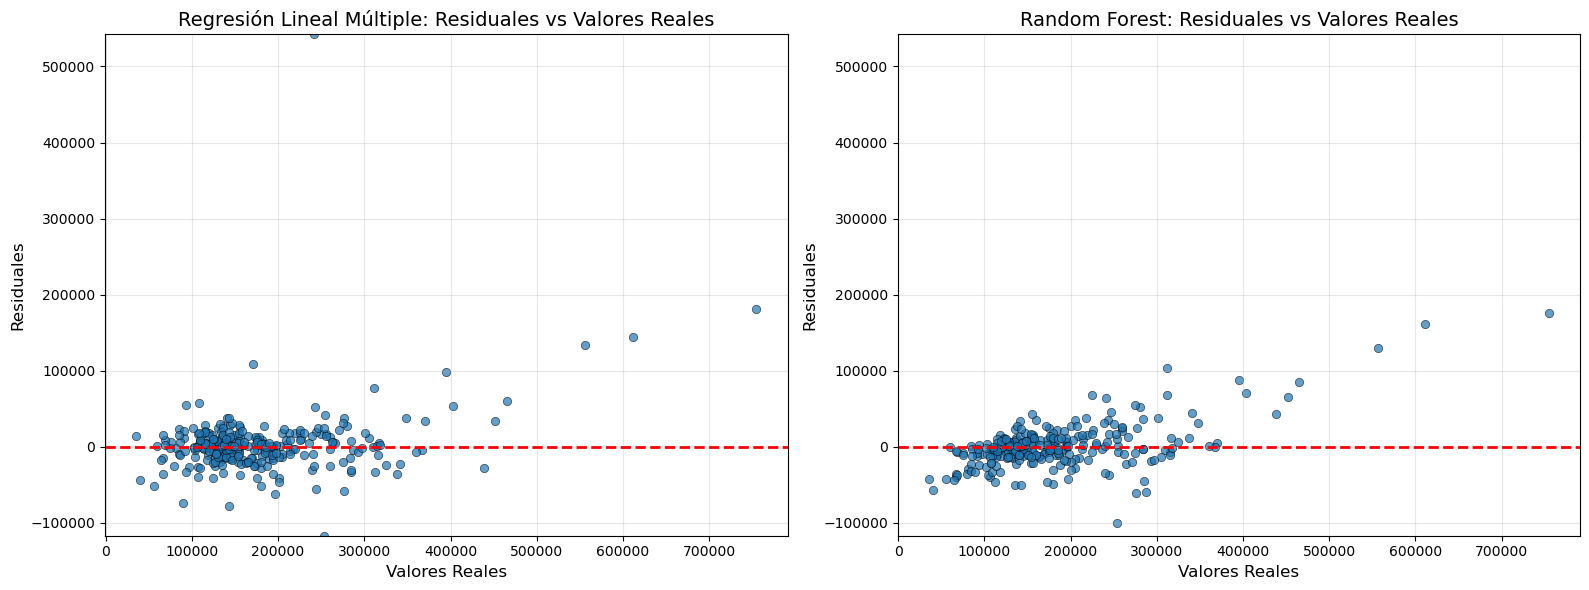

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para configurar los límites de escala
def get_common_limits(*arrays):
    min_val = min(arr.min() for arr in arrays)
    max_val = max(arr.max() for arr in arrays)
    return min_val, max_val

# Gráficos comparativos para Predicciones vs Valores Reales
def plot_predictions_side_by_side(y_test, y_pred_linear, y_pred_rf):
    y_min, y_max = get_common_limits(y_test, y_pred_linear, y_pred_rf)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Gráfico de Regresión Lineal
    sns.scatterplot(ax=axes[0], x=y_test, y=y_pred_linear, alpha=0.7, edgecolor='k')
    axes[0].plot([y_min, y_max], [y_min, y_max], color='red', linestyle='--', linewidth=2)
    axes[0].set_title("Regresión Lineal Múltiple: Predicciones vs Valores Reales", fontsize=14)
    axes[0].set_xlabel("Valores Reales", fontsize=12)
    axes[0].set_ylabel("Predicciones", fontsize=12)
    axes[0].set_xlim(y_min, y_max)
    axes[0].set_ylim(y_min, y_max)
    axes[0].grid(alpha=0.3)

    # Gráfico de Random Forest
    sns.scatterplot(ax=axes[1], x=y_test, y=y_pred_rf, alpha=0.7, edgecolor='k')
    axes[1].plot([y_min, y_max], [y_min, y_max], color='red', linestyle='--', linewidth=2)
    axes[1].set_title("Random Forest: Predicciones vs Valores Reales", fontsize=14)
    axes[1].set_xlabel("Valores Reales", fontsize=12)
    axes[1].set_ylabel("Predicciones", fontsize=12)
    axes[1].set_xlim(y_min, y_max)
    axes[1].set_ylim(y_min, y_max)
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

# Gráficos comparativos para Residuales vs Valores Reales
def plot_residuals_side_by_side(y_test, y_pred_linear, y_pred_rf):
    residuals_linear = y_test - y_pred_linear
    residuals_rf = y_test - y_pred_rf
    residual_min, residual_max = get_common_limits(residuals_linear, residuals_rf)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Gráfico de Residuales para Regresión Lineal
    sns.scatterplot(ax=axes[0], x=y_test, y=residuals_linear, alpha=0.7, edgecolor='k')
    axes[0].axhline(0, color='red', linestyle='--', linewidth=2)
    axes[0].set_title("Regresión Lineal Múltiple: Residuales vs Valores Reales", fontsize=14)
    axes[0].set_xlabel("Valores Reales", fontsize=12)
    axes[0].set_ylabel("Residuales", fontsize=12)
    axes[0].set_ylim(residual_min, residual_max)  # Asegurar la misma escala en Y
    axes[0].grid(alpha=0.3)

    # Gráfico de Residuales para Random Forest
    sns.scatterplot(ax=axes[1], x=y_test, y=residuals_rf, alpha=0.7, edgecolor='k')
    axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
    axes[1].set_title("Random Forest: Residuales vs Valores Reales", fontsize=14)
    axes[1].set_xlabel("Valores Reales", fontsize=12)
    axes[1].set_ylabel("Residuales", fontsize=12)
    axes[1].set_ylim(residual_min, residual_max)  # Asegurar la misma escala en Y
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

# Mostrar gráficos de Predicciones vs Valores Reales
plot_predictions_side_by_side(y_test, y_pred_linear, y_pred_rf)

# Mostrar gráficos de Residuales vs Valores Reales
plot_residuals_side_by_side(y_test, y_pred_linear, y_pred_rf)

In [45]:
alpha = 0.01
# Residuales para cada modelo
residuals_linear = y_test - y_pred_linear
residuals_rf = y_test - y_pred_rf

# Shapiro-Wilk para Regresión Lineal
shapiro_linear = shapiro(residuals_linear)
print(f"Regresión Lineal: W-Statistic = {shapiro_linear.statistic:.4f}, p-value = {shapiro_linear.pvalue:.4e}")
print(shapiro_linear.pvalue<alpha)

# Shapiro-Wilk para Random Forest
shapiro_rf = shapiro(residuals_rf)
print(f"Random Forest: W-Statistic = {shapiro_rf.statistic:.4f}, p-value = {shapiro_rf.pvalue:.4e}")
print(shapiro_rf.pvalue<alpha)

Regresión Lineal: W-Statistic = 0.5413, p-value = 5.9418e-27
True
Random Forest: W-Statistic = 0.8416, p-value = 1.2795e-16
True


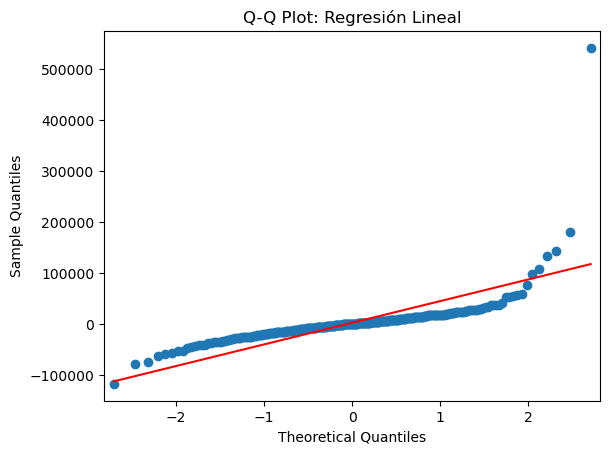

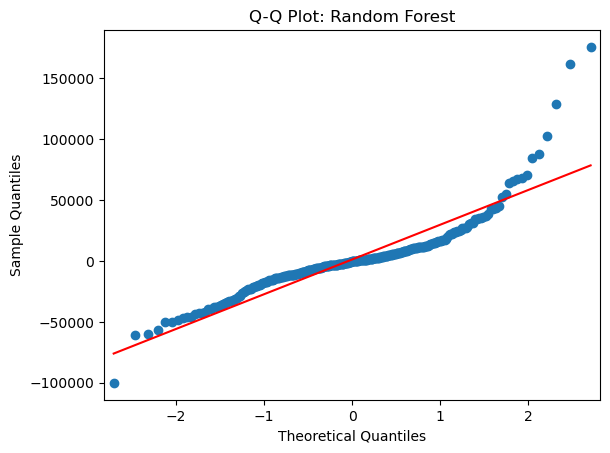

In [46]:
# Q-Q Plot para Regresión Lineal
sm.qqplot(residuals_linear, line='s')
plt.title("Q-Q Plot: Regresión Lineal")
plt.show()

# Q-Q Plot para Random Forest
sm.qqplot(residuals_rf, line='s')
plt.title("Q-Q Plot: Random Forest")
plt.show()

In [47]:
alpha = 0.01
# Test t para Regresión Lineal
t_test_linear = ttest_1samp(residuals_linear, popmean=0)
print(f"Regresión Lineal: T-Statistic = {t_test_linear.statistic:.4f}, p-value = {t_test_linear.pvalue:.4e}")
print(t_test_linear.pvalue<alpha)

# Test t para Random Forest
t_test_rf = ttest_1samp(residuals_rf, popmean=0)
print(f"Random Forest: T-Statistic = {t_test_rf.statistic:.4f}, p-value = {t_test_rf.pvalue:.4e}")
print(t_test_rf.pvalue<alpha)

Regresión Lineal: T-Statistic = 1.1806, p-value = 2.3874e-01
False
Random Forest: T-Statistic = 0.7182, p-value = 4.7323e-01
False


In [48]:
# Durbin-Watson para Regresión Lineal
dw_linear = durbin_watson(residuals_linear)
print(f"Regresión Lineal: Durbin-Watson = {dw_linear:.4f}")

# Durbin-Watson para Random Forest
dw_rf = durbin_watson(residuals_rf)
print(f"Random Forest: Durbin-Watson = {dw_rf:.4f}")

Regresión Lineal: Durbin-Watson = 2.0373
Random Forest: Durbin-Watson = 1.9168
